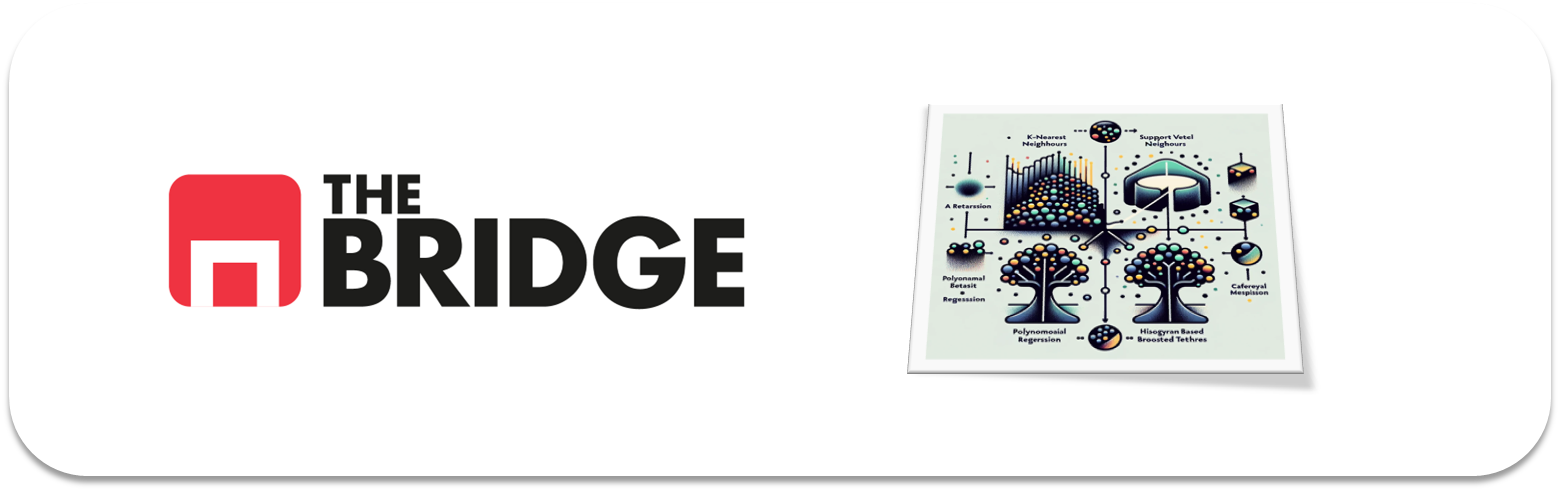

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ML_tool_box_basic as tbb
import bootcampviztools as bt

from sklearn.model_selection import train_test_split

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

### 1. Carga del DF

In [2]:
df_credit = pd.read_csv("./data/credit_npo.csv")

### 2. Vistazo al DF

In [3]:
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
df_credit.describe(include="all")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [5]:
tbb.describe_features(df_credit)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,SeriousDlqin2yrs,int64,12537,0,0.00,2,0.02,Binaria
1,RevolvingUtilizationOfUnsecuredLines,float64,12537,0,0.00,10764,85.86,Numérica Continua
2,age,int64,12537,0,0.00,78,0.62,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,int64,12537,0,0.00,10,0.08,Numérica Discreta
4,DebtRatio,float64,12537,0,0.00,11547,92.10,Numérica Continua
5,MonthlyIncome,float64,11816,721,5.75,4167,33.24,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,int64,12537,0,0.00,43,0.34,Numérica Discreta
7,NumberOfTimes90DaysLate,int64,12537,0,0.00,13,0.10,Numérica Discreta
8,NumberRealEstateLoansOrLines,int64,12537,0,0.00,16,0.13,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,int64,12537,0,0.00,8,0.06,Categórica


### Gestión de missings

### MonthlyIncome

- MonthlyIncome tiene 721 missing. El problema es que no tengo muy claro si sistituirlo por la media o la mediana podria mejorar algo, pues al tener una larga cola, no se esos valores si impactaran sobre algunas de las filas donde deberia de haber sido un valor de la larga cola y esto haga que el modelo trabaje mal.
- Se va a calcular el impacto que tiene quitarlos sobre X y sobre y:
    - Sobre "X" es sensiblemente peor que "y", perderiamos un 6 % y 4 % de datos respectivamente.

Spolier: Me he adelantado al univariante y veo que tanto para target 1 o 0, las distribuciones estan muy cerca del Q75%, por lo que quiza, la mediana si que es buen valor para ser sustituido.

In [6]:
df_credit.MonthlyIncome.mean()

6864.815419769804

In [7]:
target_dis = df_credit.SeriousDlqin2yrs.value_counts()
target_dis

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

In [8]:
nan_income = df_credit[df_credit['MonthlyIncome'].isna()]
nan_distribution = nan_income['SeriousDlqin2yrs'].value_counts()
nan_distribution

SeriousDlqin2yrs
0    687
1     34
Name: count, dtype: int64

In [9]:
impacto_en_0 = nan_distribution[0]/target_dis[0]*100
impacto_en_1 = nan_distribution[1]/target_dis[1]*100

print(impacto_en_0)
print(impacto_en_1)

5.885376509894629
3.935185185185185


In [10]:
df_credit.fillna({"MonthlyIncome": df_credit.MonthlyIncome.median()}, inplace=True)
df_credit.MonthlyIncome.value_counts(dropna=False)

MonthlyIncome
5416.0     755
5000.0     275
4000.0     201
6000.0     186
3000.0     182
          ... 
5281.0       1
2566.0       1
9058.0       1
16317.0      1
3798.0       1
Name: count, Length: 4167, dtype: int64

### NumberOfDependents

- Creo que aqui si que podemos sustituirlo por la moda, ya que se s una categorica.
- Spolier: Viendo la distribuciones, le voy a dar un valor de 0, pues creo que sera e que menos impacto tendra sobre el modelo, pues en ambas distribuciones del target, es el que mas hay.

In [11]:
df_credit.NumberOfDependents.mode()

0    0.0
Name: NumberOfDependents, dtype: float64

In [12]:
df_credit.fillna({"NumberOfDependents": 0.0}, inplace=True)
df_credit.NumberOfDependents.value_counts(dropna=False)

NumberOfDependents
0.0     7112
1.0     2384
2.0     1816
3.0      882
4.0      253
5.0       62
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [13]:
tbb.describe_features(df_credit)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,SeriousDlqin2yrs,int64,12537,0,0.0,2,0.02,Binaria
1,RevolvingUtilizationOfUnsecuredLines,float64,12537,0,0.0,10764,85.86,Numérica Continua
2,age,int64,12537,0,0.0,78,0.62,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,int64,12537,0,0.0,10,0.08,Numérica Discreta
4,DebtRatio,float64,12537,0,0.0,11547,92.10,Numérica Continua
5,MonthlyIncome,float64,12537,0,0.0,4167,33.24,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,int64,12537,0,0.0,43,0.34,Numérica Discreta
7,NumberOfTimes90DaysLate,int64,12537,0,0.0,13,0.10,Numérica Discreta
8,NumberRealEstateLoansOrLines,int64,12537,0,0.0,16,0.13,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,int64,12537,0,0.0,8,0.06,Categórica


### 3. Descripción variables

Fuente: https://github.com/DrIanGregory/Kaggle-GiveMeSomeCredit):

| Nombre de la Variable                                   | Descripción                                                                                          |
|--------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| SeriousDlqin2yrs                                      | Persona que ha experimentado 90 días de morosidad o peor.                                          |
| RevolvingUtilizationOfUnsecuredLines                  | Saldo total en tarjetas de crédito y líneas de crédito personales, excepto bienes raíces y deuda a plazos como préstamos para automóviles, dividido por la suma de los límites de crédito. |
| Age                                                    | Edad del prestatario en años.                                                                        |
| NumberOfTime30-59DaysPastDueNotWorse                 | Número de veces que el prestatario ha estado 30-59 días en mora pero no peor en los últimos 2 años. |
| DebtRatio                                             | Pagos mensuales de deuda, pensiones alimenticias, costos de vida divididos por el ingreso bruto mensual. |
| MonthlyIncome                                         | Ingreso mensual.                                                                                     |
| NumberOfOpenCreditLinesAndLoans                       | Número de préstamos abiertos (a plazos como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito). |
| NumberOfTimes90DaysLate                               | Número de veces que el prestatario ha estado 90 días o más en mora.                                 |
| NumberRealEstateLoansOrLines                           | Número de hipotecas y préstamos inmobiliarios, incluidas las líneas de crédito sobre el capital acumulado en la vivienda. |
| NumberOfTime60-89DaysPastDueNotWorse                 | Número de veces que el prestatario ha estado 60-89 días en mora pero no peor en los últimos 2 años. |
| NumberOfDependents                                   | Número de personas a su cargo en la familia, excluyendose a si mismos. (Conyugue, hijos, etc.)| 

### 4. Clasificación inicial variables

Partimos de la base de que todas son de tipo numérico, int o float, por lo que habra que vigilar cuales de ellas son categóricas.

Numéricas:

- RevolvingUtilizationOfUnsecuredLines --> Numerica continuna con muy alta cardinalidad. Aunque el 75% de sus valores esta bajo 0.6 y tiene un max de 6...tendra larga cola.
- Age --> Es la edad y bueno, no siendo una super continua tiene 78 valores unicos, la dejaremos como numerica, aunque quiza reducirla en rangos de 5 o 10 años tendria sentido.
- Cat? DebtRatio --> Altísima cardinalidad, pero muchisima diferencia entre el quartil 75% y el max (0.5 a 99). Hay que ver que pasa ahi.
- MonthlyIncome --> Es lo que es. Tiene casi un 6% de missings. Es numerica y continua.
- Cat? NumberOfOpenCreditLinesAndLoans --> Es numerica pero viendo sus numeros podria hacerse categorica. Su distrubucion deja claro que por encima de 11 creditos abiertos hay mucha menos gente pero con un numero de creditos abiertos muy superior. Se podria hacer clasificacion de 1 o 2 creditos (lo normal que tiene la gente), de 3 a 11 y luego el resto. se vera mas adelante.


Categóricas:

- NumberOfTime30-59DaysPastDueNotWorse --> Es rara. Va de 0 a 98, y el quartil 75% muestra 0. Es muy probable que se pueda hacer con tres catefgorias solo, siendo la principal 0. Hay que revisar las frecuencias de cada valor.
- NumberOfTimes90DaysLate --> Como arriba, esta columna tiene sus quartiles a 0 y luego un max de 98. Seguramente se puedan hacer categorias de ella.
- NumberRealEstateLoansOrLines --> Igual que la anterior, es posible que se pueda hacer categorica. Hay mucha diferencia con el Q75% y el max.
- NumberOfTime60-89DaysPastDueNotWorse --> Como las dos anteriores.
- NumberOfDependents --> Aqui lo mismo, la gran mayoria tiene 0 dependientes, con lo que se podria hacer 2 o 3 categorias.


In [14]:
features_num_iniciales = ["RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans"]
features_cat_iniciales = ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse", "NumberRealEstateLoansOrLines","NumberOfDependents"]

### 5. Análisis Univariante

### 5.1 Numéricas

(5, 2)


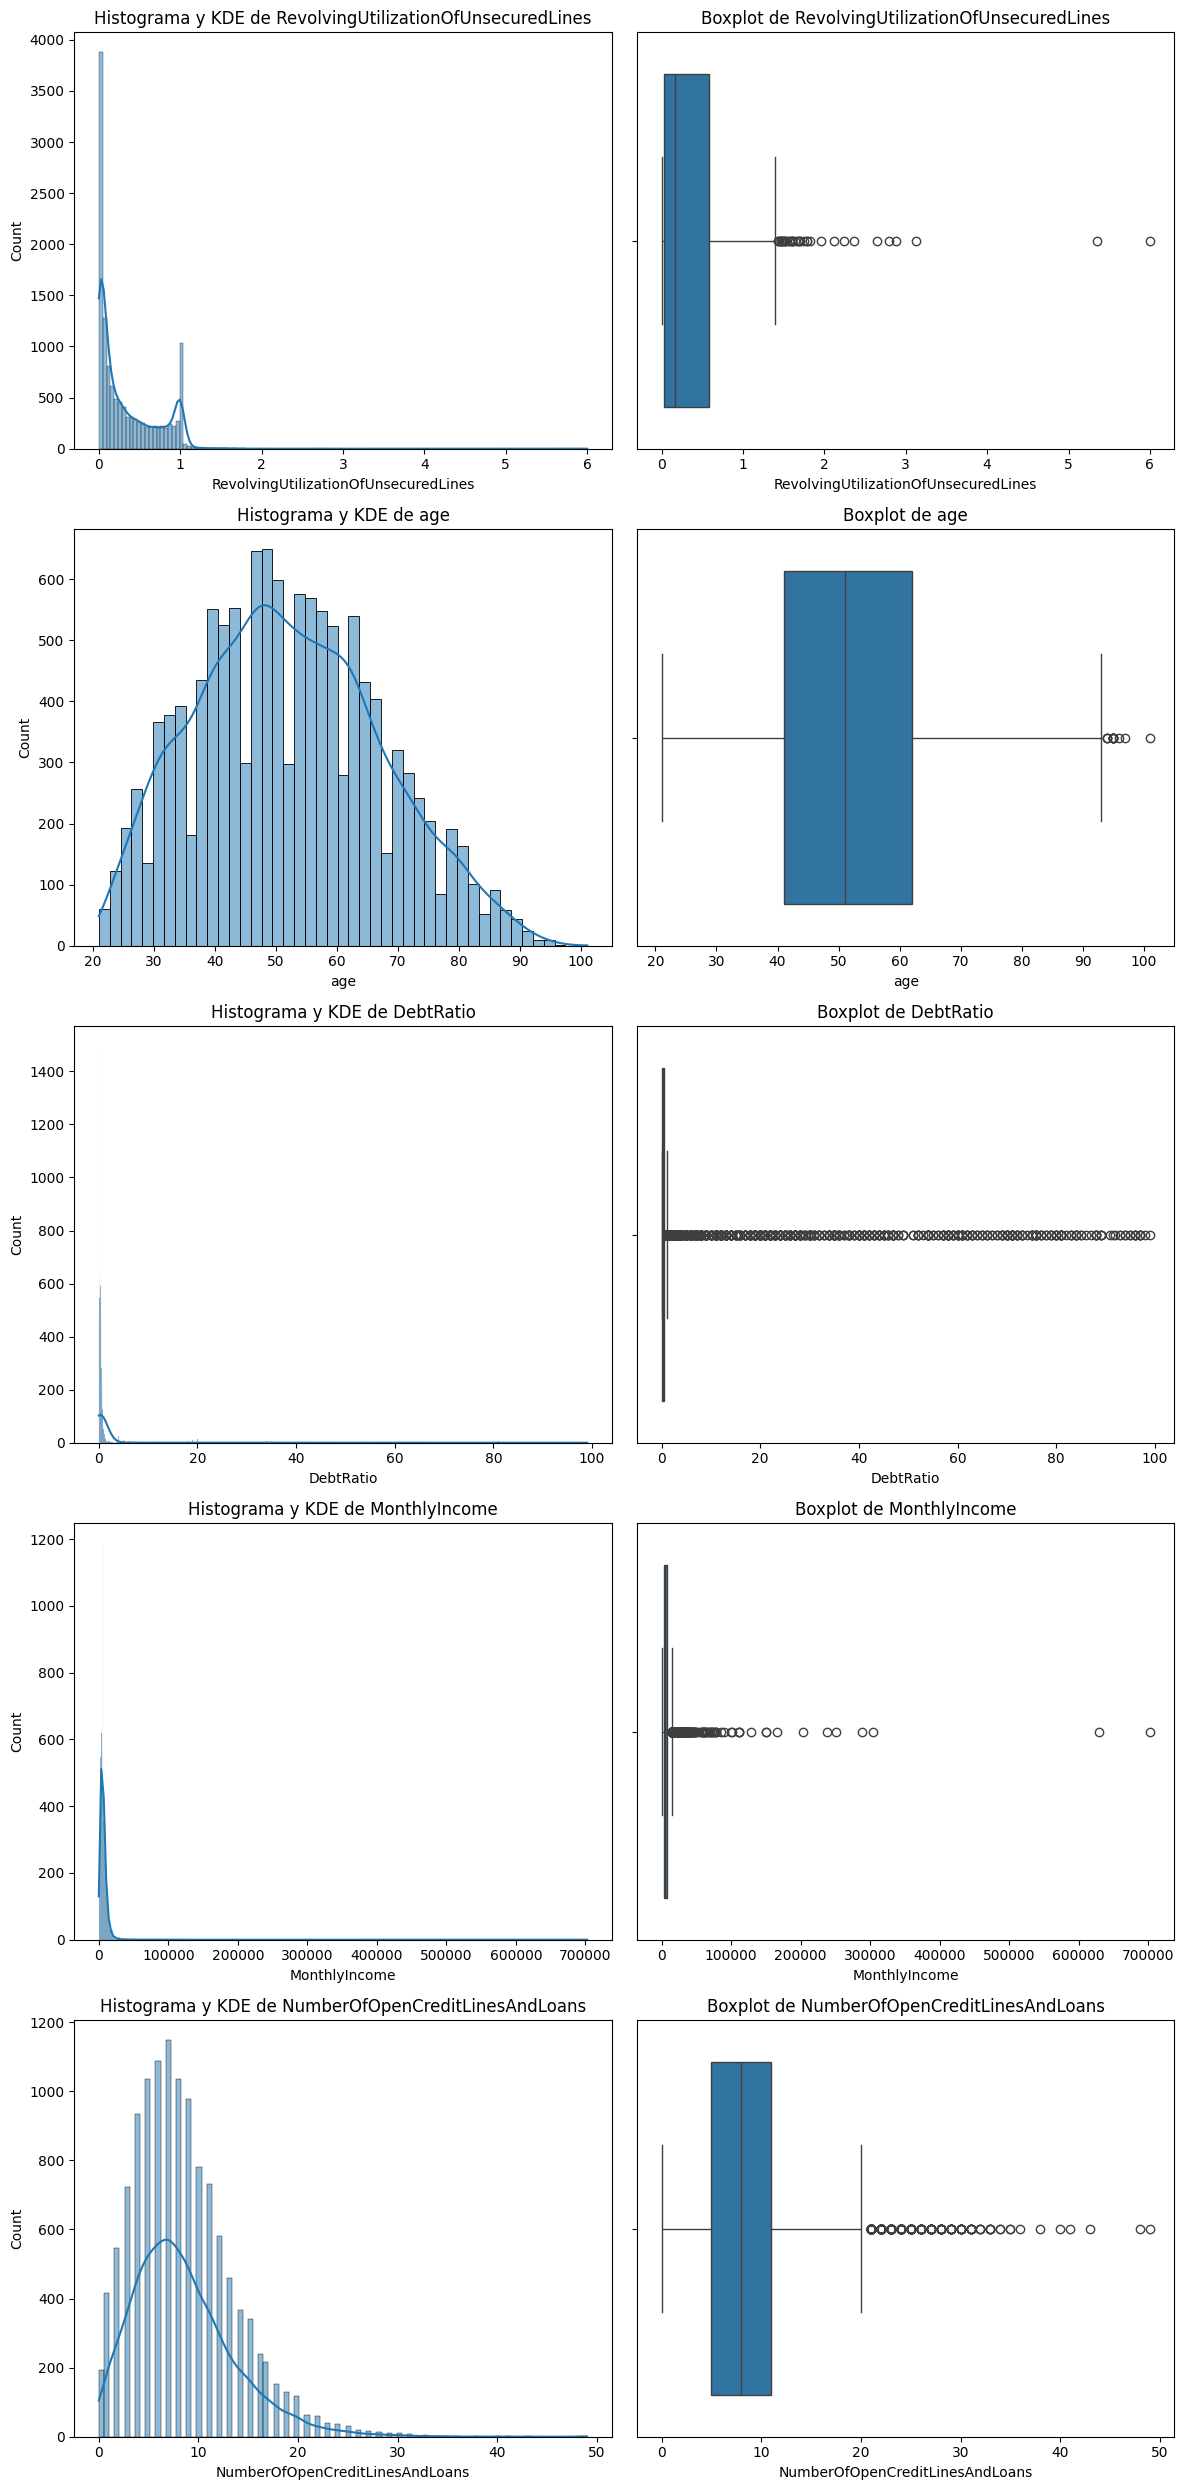

In [15]:
bt.plot_combined_graphs(df_credit, features_num_iniciales)

### 5.2 Categóricas

Se observa que el valor de 98 se repite en las tres variables que tiene los datos de impagos en diferentes rangos de tiempo.    
Ese valor no parece que sea un valor real, pienso que es una codificación del propio banco que tendra algun sentido (habria que hablarlo con negocio).
Si que es cierto que su frecuencia es muy baja, casi despreciable, por lo que habria que ver que hacer.

Son todas categoricas con muchas categorias y podrian dejarse asi, pues si que son ordinarias dentro de lo que cabe, pues el valor del numero si que indica que sean mejores o peores, por lo que se dejaran como estan.    
Los numeros 98 en un principio se habia pensado cambiarlos por el numero siguiente de la distribucion, pero quiza la idea sea que resalte ese numero, pues indicara con mas claridad los casos donde el numero de dias exedidos es muy grande, cosa importante a la hora de predecir (espero no equivocarme mucho).

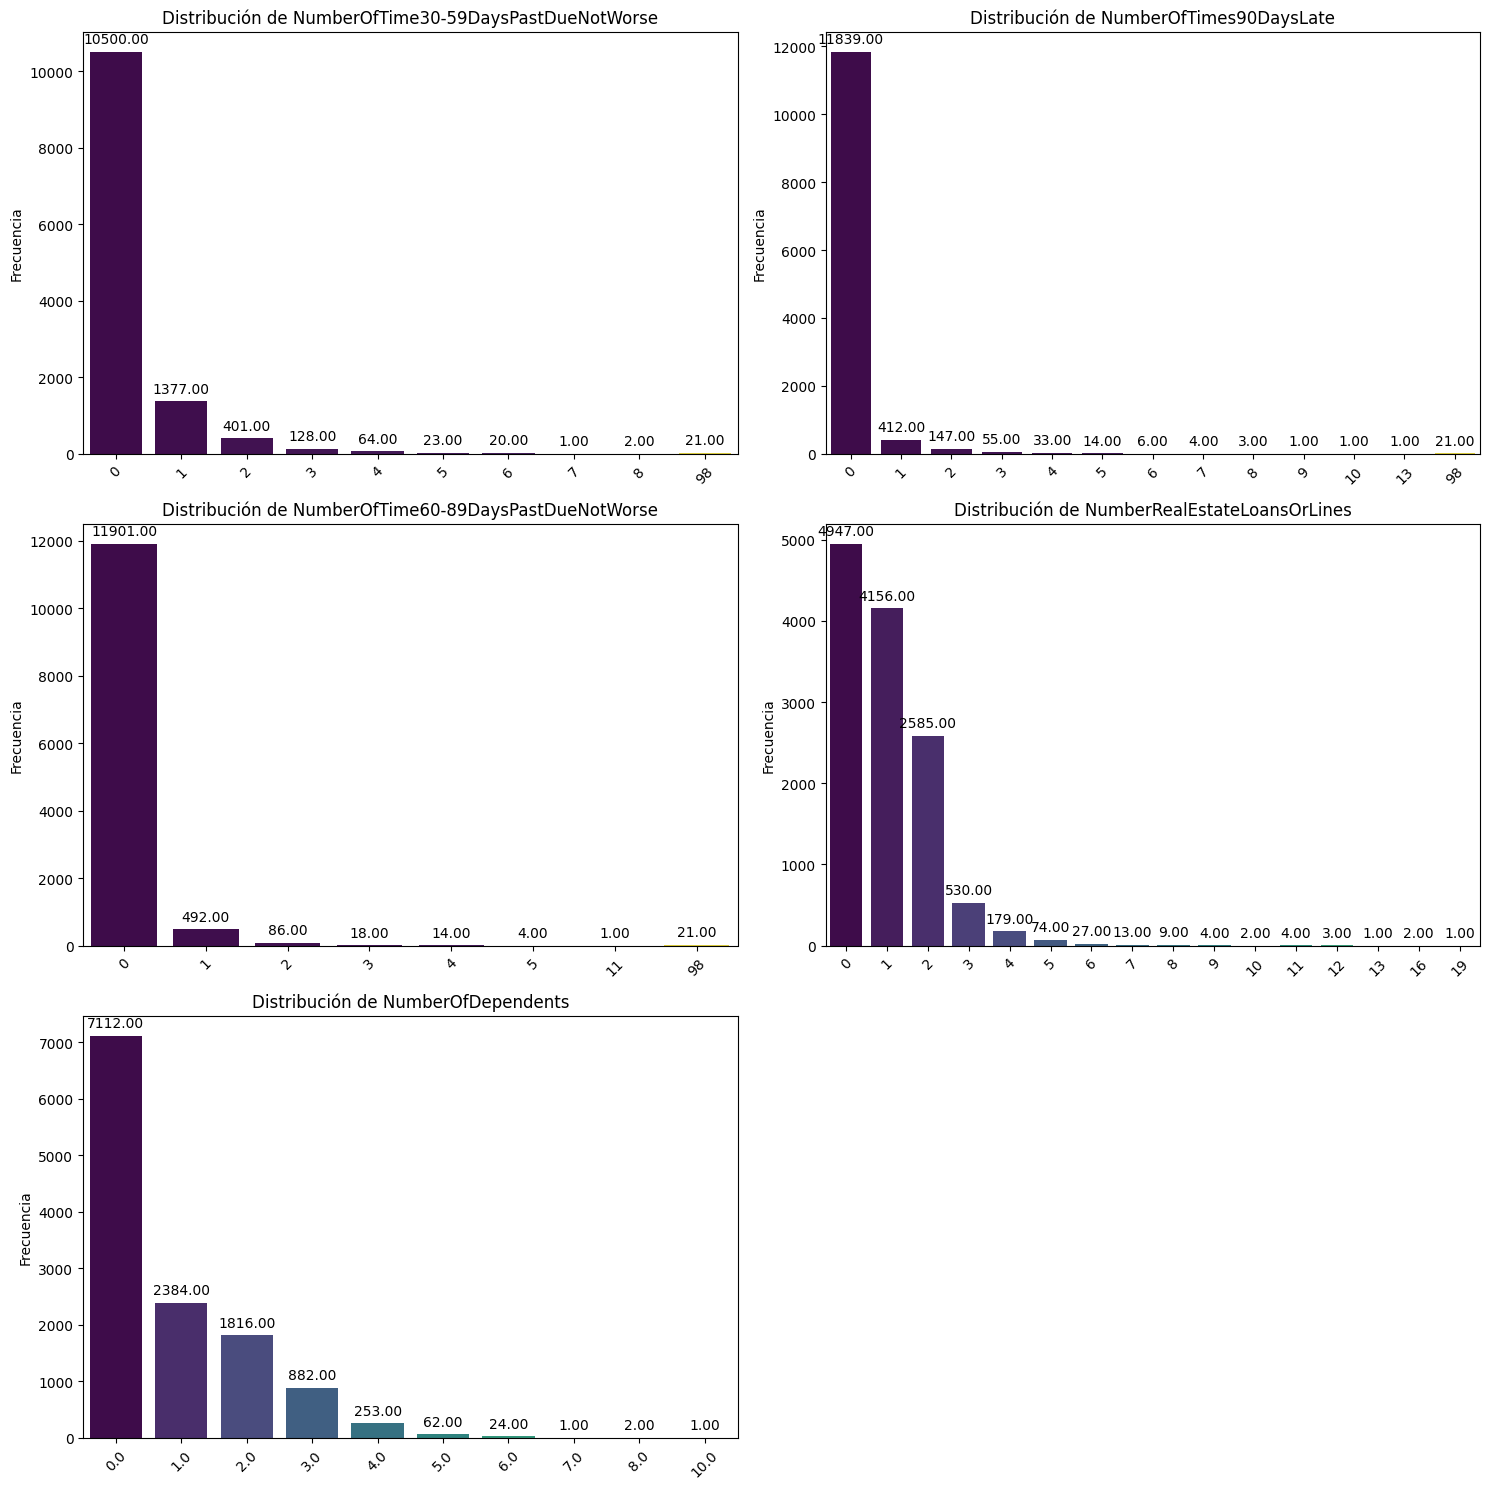

In [16]:
bt.pinta_distribucion_categoricas(df_credit, features_cat_iniciales, mostrar_valores=True)

### Estudio valor 98

Se repite el mismo número de veces en las tres columnas (21 veces).
Habria que preguntar a negocio, pero lo tomaremos como que quiza es la codificacion de que ha superado un umbral puesto por el banco.

In [17]:
for col in ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"]:
    print(df_credit[col].value_counts())

NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64
NumberOfTimes90DaysLate
0     11839
1       412
2       147
3        55
4        33
98       21
5        14
6         6
7         4
8         3
10        1
9         1
13        1
Name: count, dtype: int64
NumberOfTime60-89DaysPastDueNotWorse
0     11901
1       492
2        86
98       21
3        18
4        14
5         4
11        1
Name: count, dtype: int64


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

- Problema: Es un problema de clasificacion.    

- Target: La variable a pronosticar es `SeriousDlqin2yrs` --> Que es una binaria, y creo que al banco le dira si hay o no riesgo.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [18]:
target = "SeriousDlqin2yrs"

### Comentarios distribución categórica:

- 0 = No hay riesgo
- 1 = Si hay riesgo.

- Entiendo que negocio querra saber cuando hay riesgo, por lo que en las metricas de calidad habra que pensar bien que se quiere mejorar.

- Esta muy desbalanceada. El modelo tendra problemas, por lo que sea usaran hiperparametros paraq compensarlo o alguna de las otras tecnicas (Over o Under.)


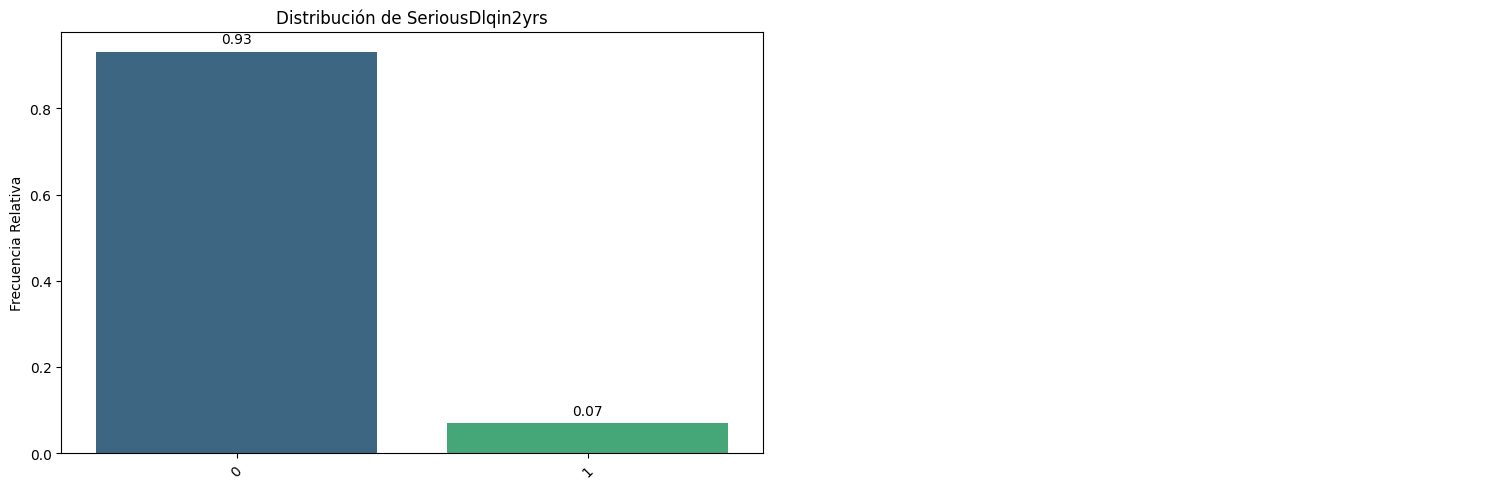

In [19]:
bt.pinta_distribucion_categoricas(df_credit, [target], relativa=True, mostrar_valores=True)

### 6. Análisis bivariante

### 6.1 Numéricas

In [20]:
def plot_bivariate_histograms(df, features_num_iniciales, target, num_graf_per_line = 2):
    num_features = len(features_num_iniciales)
    num_cols = num_graf_per_line  
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  

    for i, col in enumerate(features_num_iniciales):
        sns.histplot(data=df, x=col, hue=target, ax=axes[i], kde=True)  
        axes[i].set_title(f'Histograma Bivariante de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    

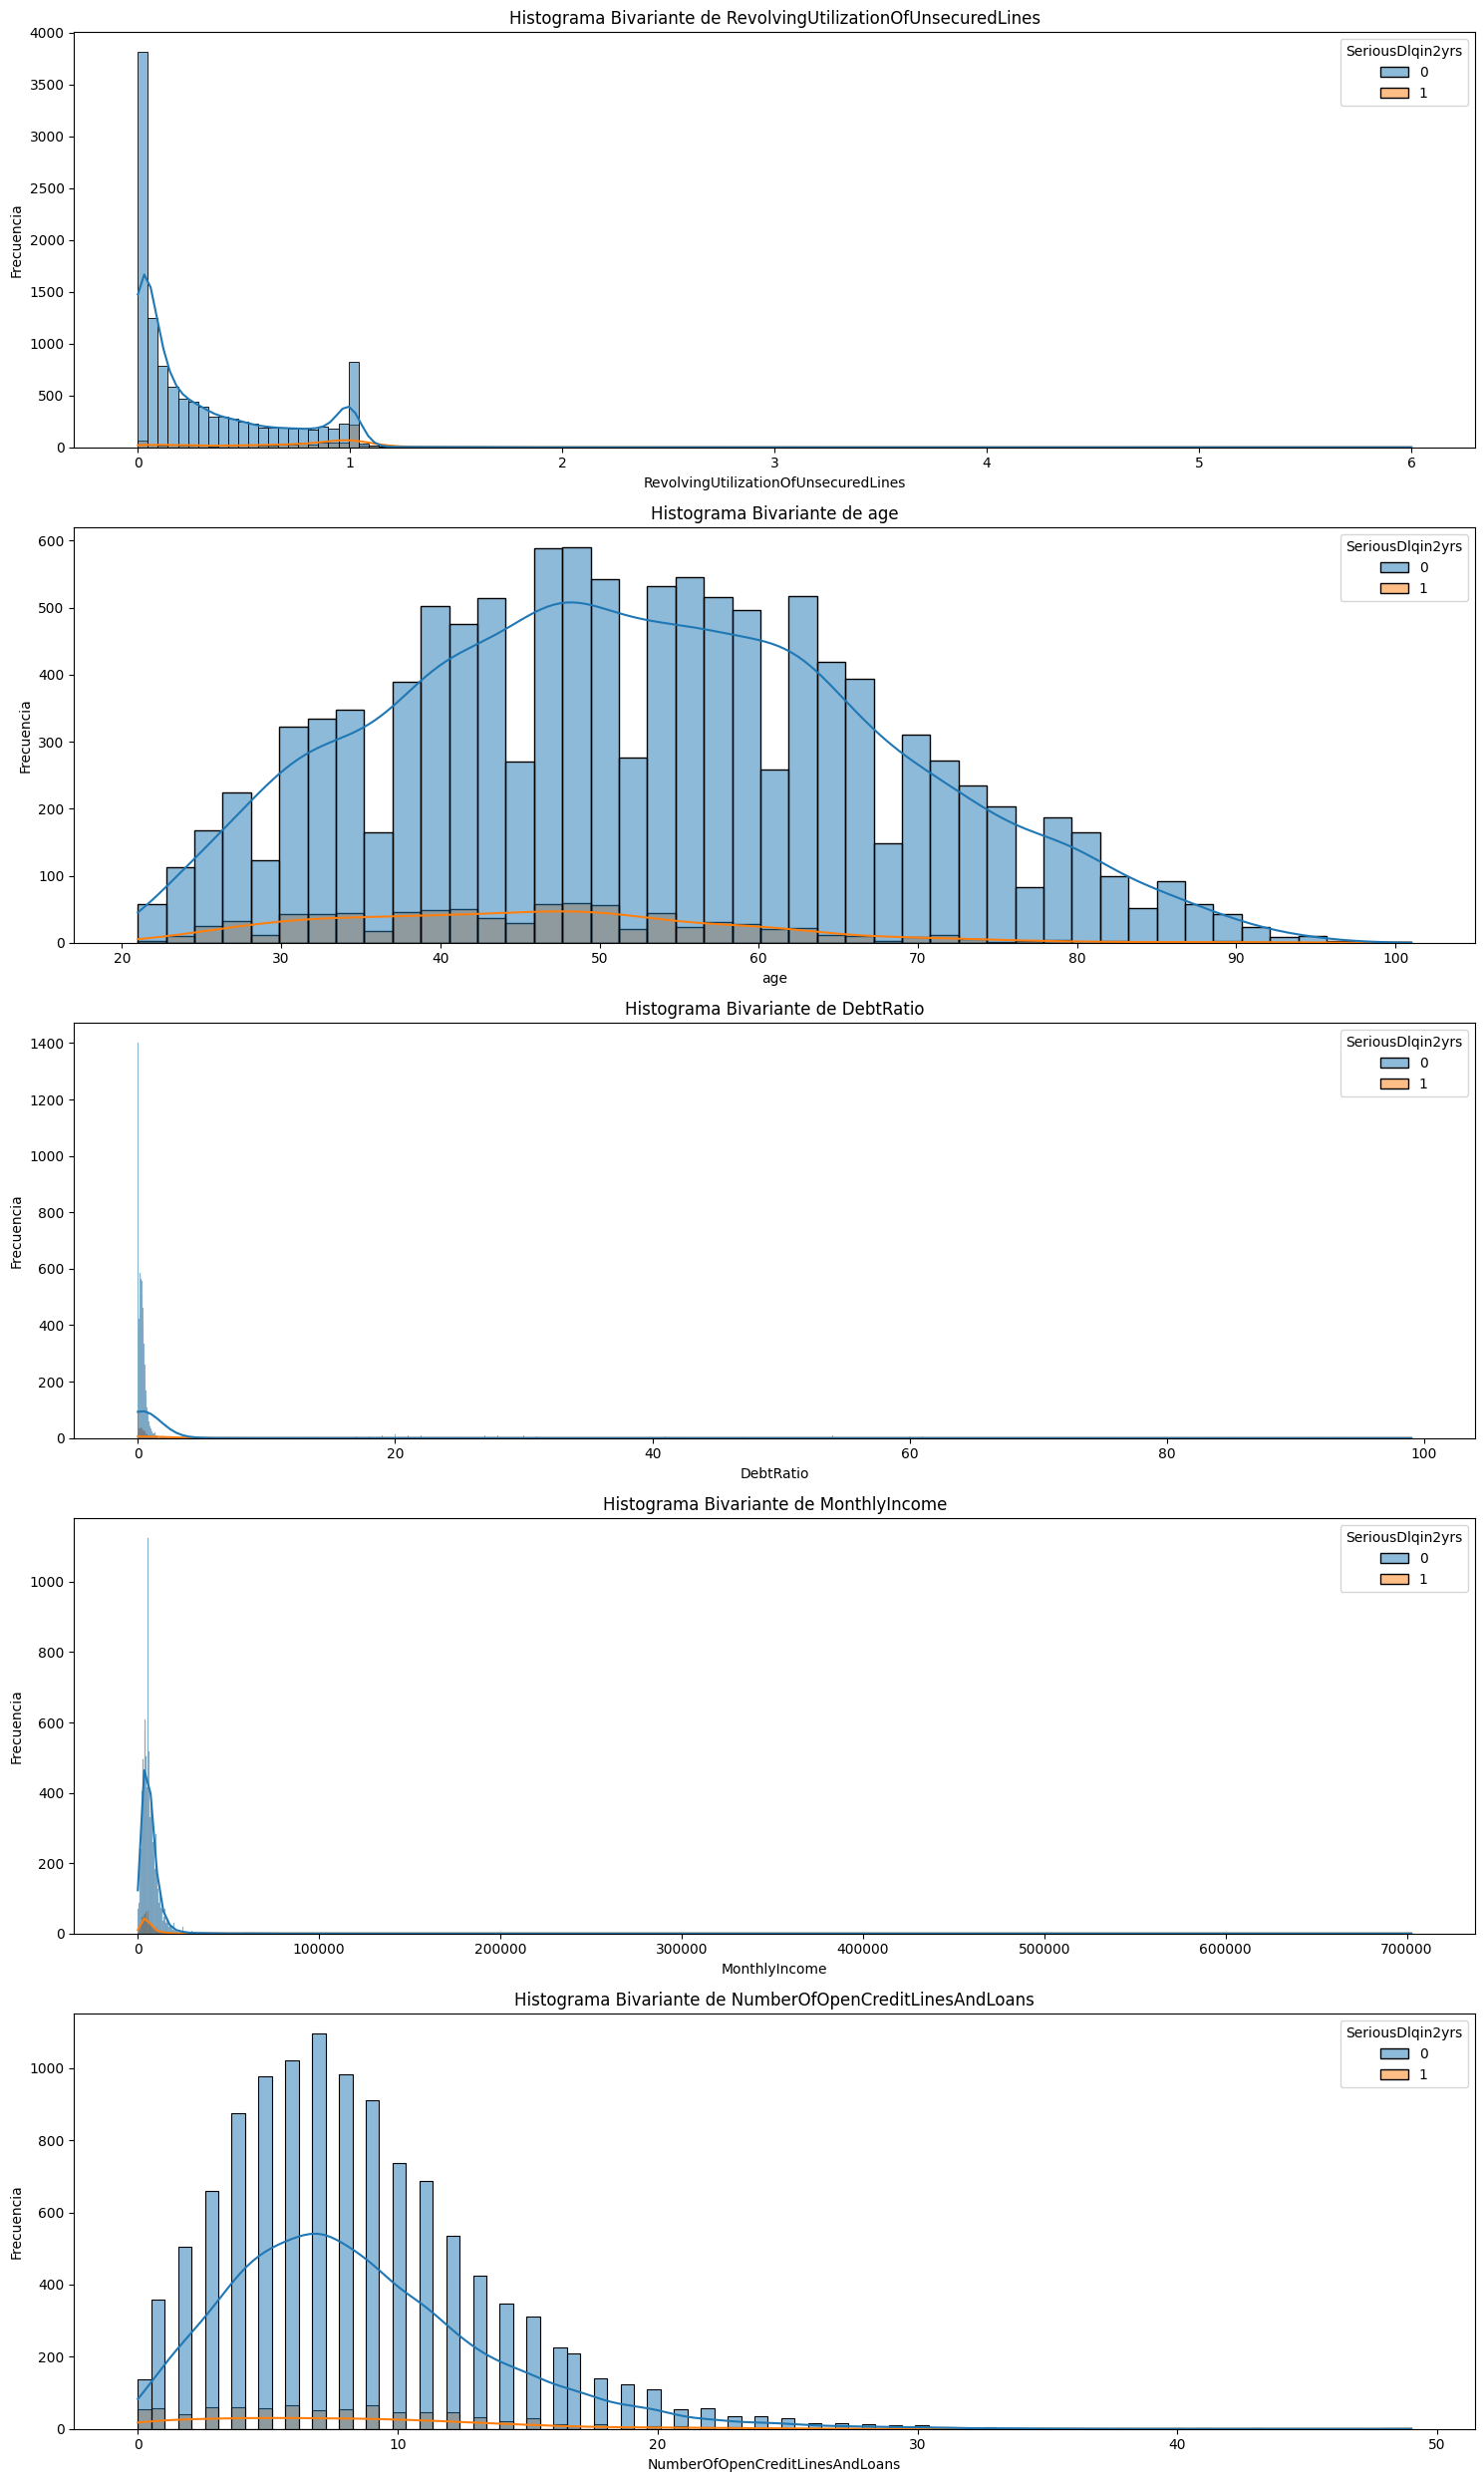

In [21]:
plot_bivariate_histograms(df_credit, features_num_iniciales, target, num_graf_per_line = 1)

### Correlacion entre variables numéricas

- Se quiere comprobar si se puede eliminar alguna columna o ver las relaciones que hay entre ellas por si fueran luego necesario hacer algun cambio en el DF.

    - Se ve que entre ellas no hay practicamente correlacion:
    
    - Age con RevolvingUtilization --> -0.28
    - NumberOfOpenCredit con RevolvingUtilization --> -0.16
    - NumberOfOpenCredit con MonthlyIncome --> 0.11

<Axes: >

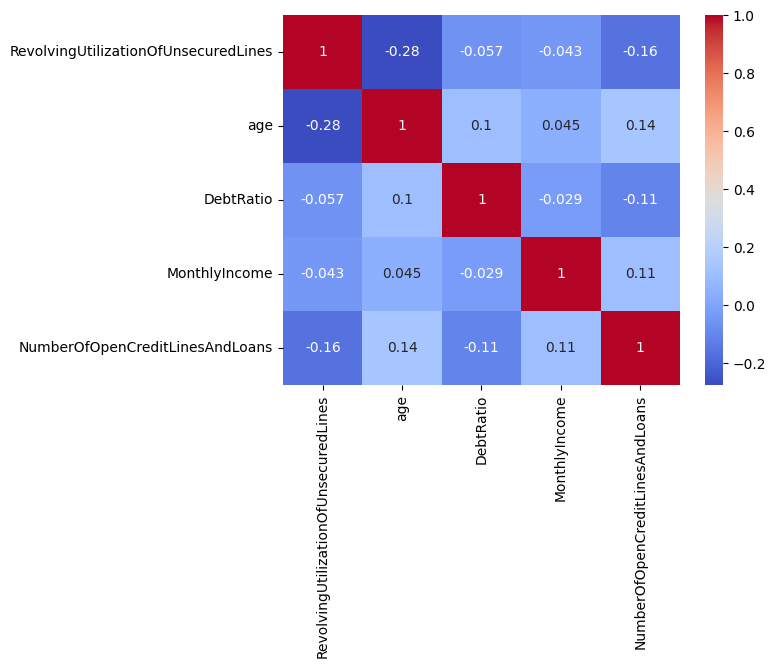

In [22]:
correlacion_features_num = df_credit[features_num_iniciales].corr()
sns.heatmap(correlacion_features_num, annot=True, cmap="coolwarm")

### Conclusiones Numéricas:    

Vemos que todas las numéricas tiene distrubuciones diferentes para los dos posibles escenarios, por lo que nos vamos a quedar todas.
Si que es cierto que muchas de ellas son de cola larga o muy larga, pero las transformaremos mas adelante.

DebtRatio, podria ser una categorica encubierta.    
Su definicion es el cociente entre el credito disponible y el credito pedido.    
Si da por debajo de 1 o es 1, quiere decir que como maximo ha consumido su credito maximo.    
Si por el contrario si es mayor que 1, quiere decir que aun tiene credito disponible.    
Se podrian hacer 3 clases: Los que han consumido mas, los que han comsumido menos y los que no han consumido nada.   
De todas formas la dejaremos como esta de momento (con mas tiempo seria interesante probarlo).

Con MonthlyIncome pasa algo parecido.

### 6.2 Categóricas

In [23]:
def plot_bivariate_counts(df, target, features_to_compare, num_graf_per_line=2, show_percentage=False):
    num_features = len(features_to_compare)
    num_cols = num_graf_per_line
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  

    for i, feature in enumerate(features_to_compare):
        ax = axes[i]
        count_plot = sns.countplot(data=df, x=target, hue=feature, ax=ax, palette='Set2')  

        ax.set_title(f'Conteo de {target} por {feature}')
        ax.set_xlabel(target)
        ax.set_ylabel('Conteo')

       
        total_counts = df[target].value_counts()

        
        for p in count_plot.patches:
            count = int(p.get_height())
            if count > 0:  
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()

                category_label = p.get_x() + p.get_width() / 2

               
                if isinstance(df[target].dtype, pd.CategoricalDtype):
                    category_value = df[target].cat.categories[int(category_label)]
                else:
                    category_value = df[target].unique()[int(category_label)]

                if show_percentage:
                    percentage = (count / total_counts[category_value]) * 100  
                    ax.text(x, y + 0.008 * max(1, y), f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)  
                else:
                    ax.text(x, y + 0.008 * max(1, y), str(count), ha='center', va='bottom', fontsize=10)  

    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

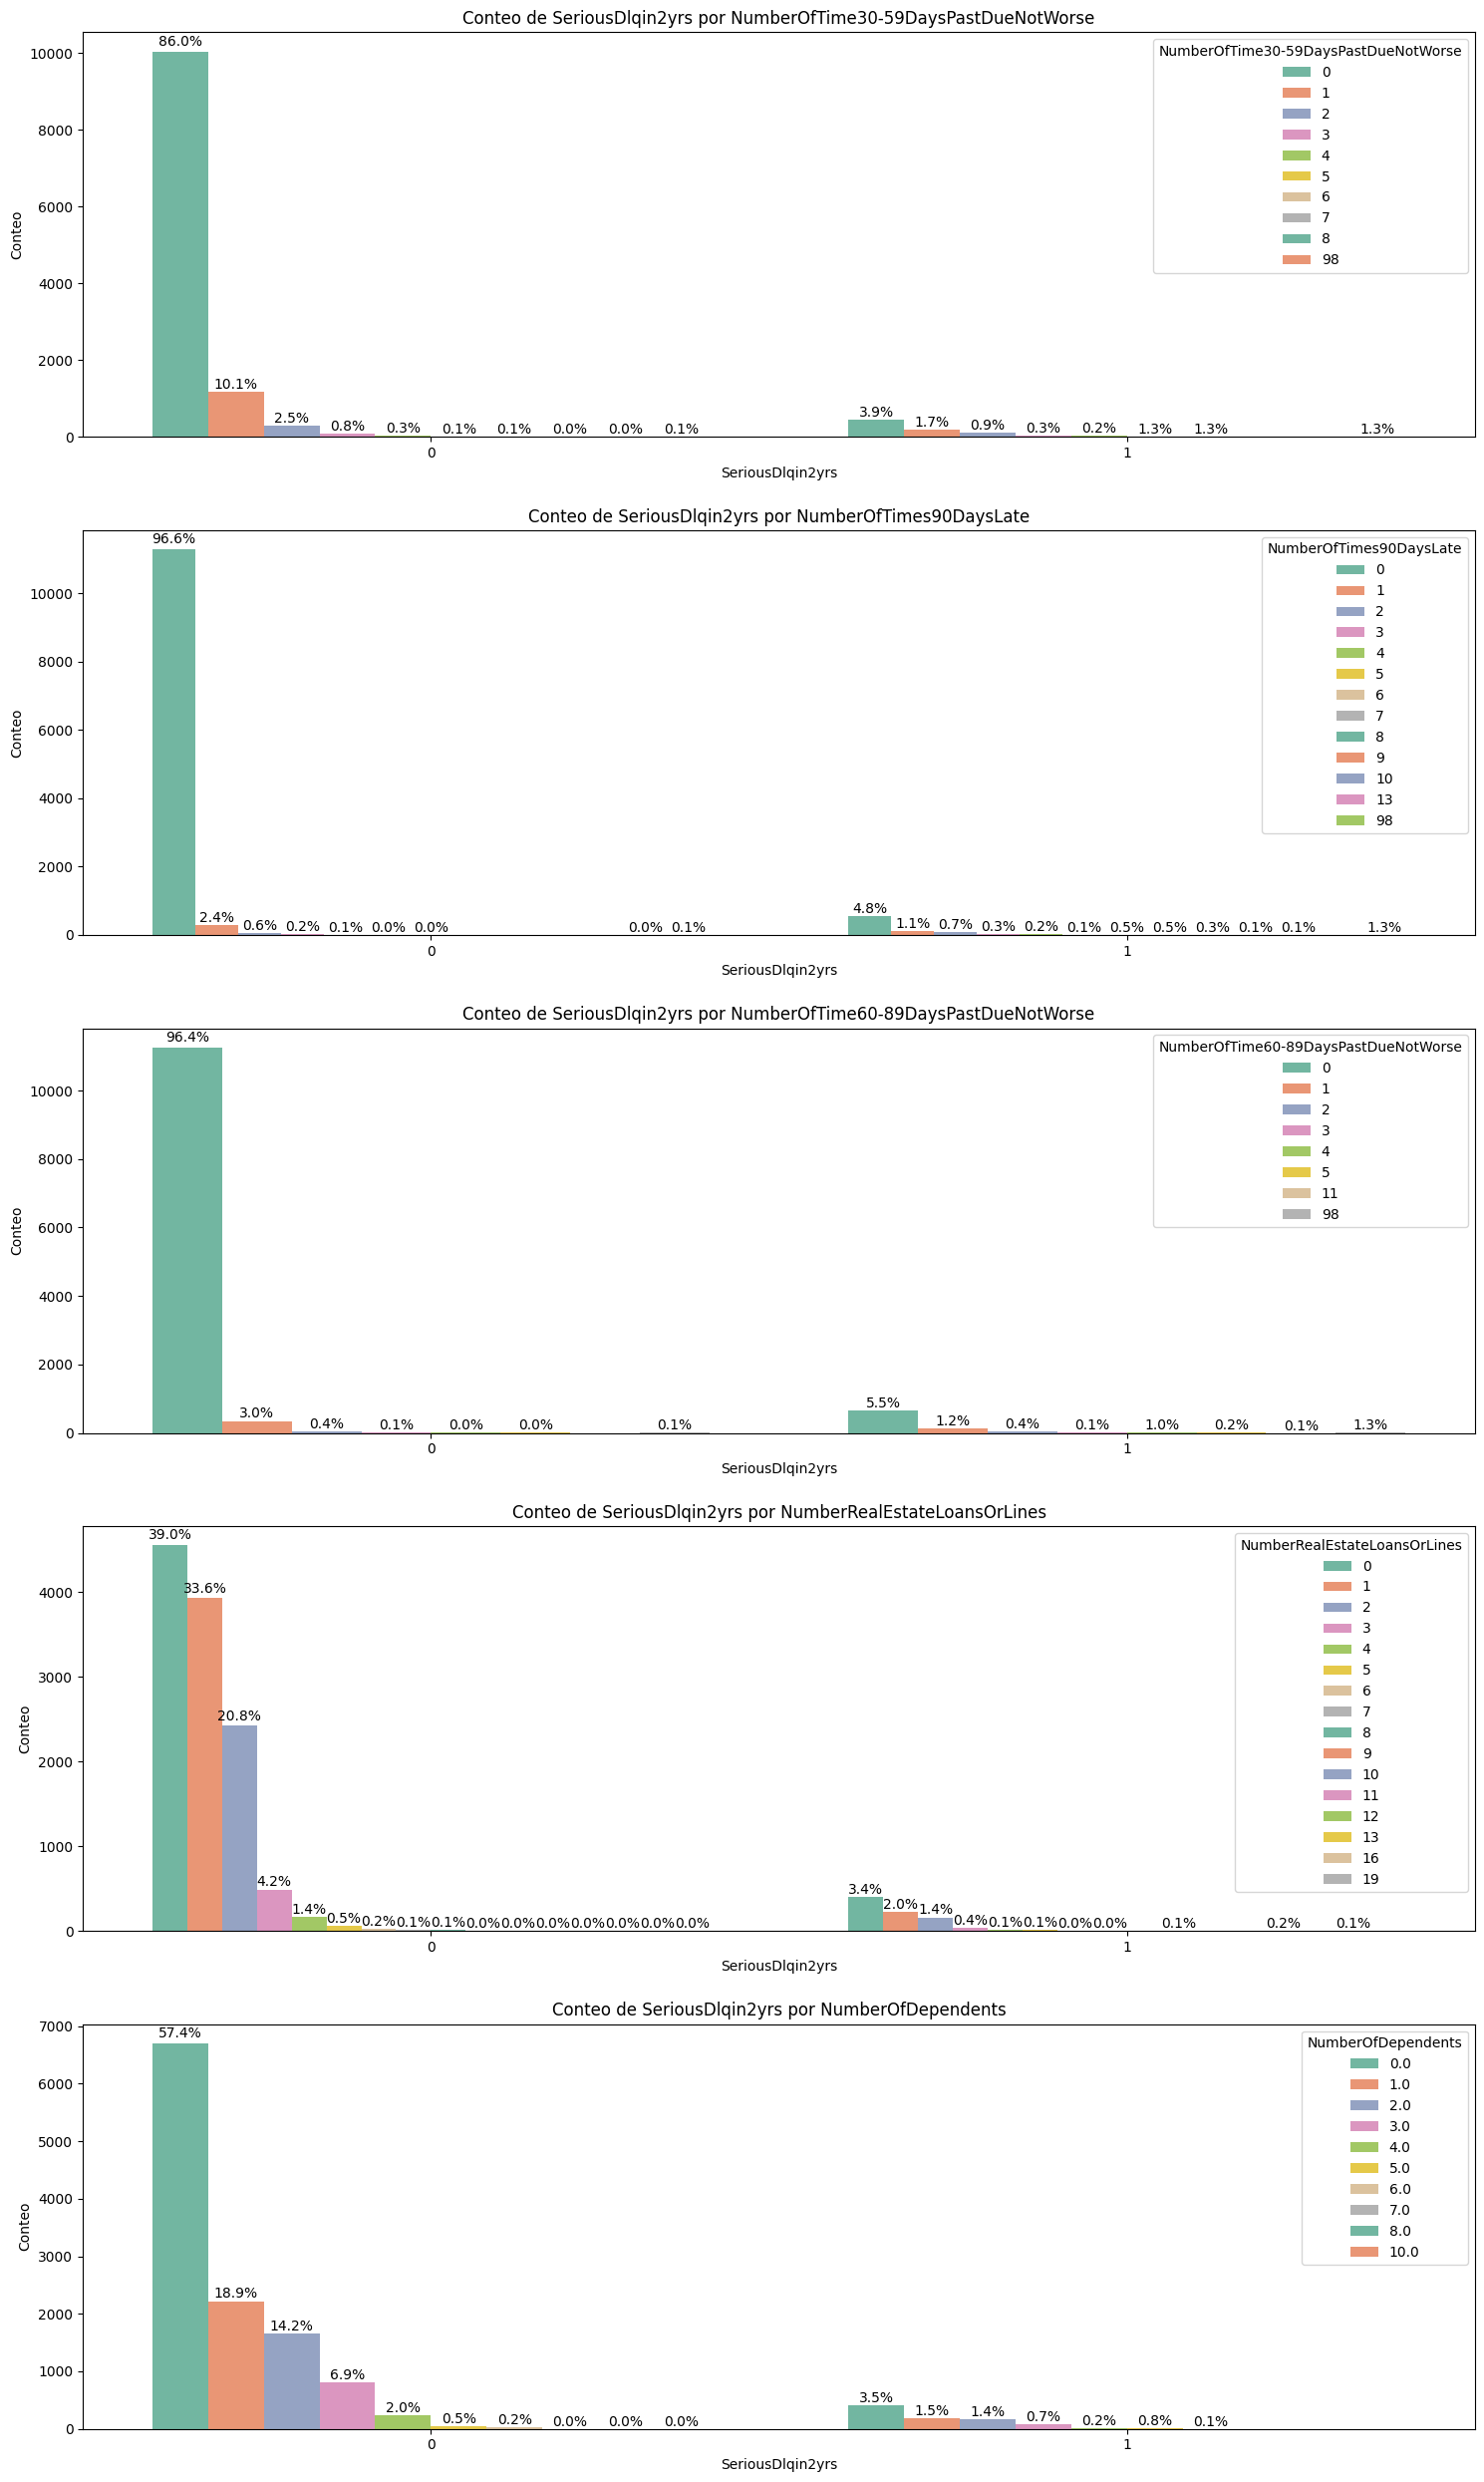

In [24]:
plot_bivariate_counts(df_credit, target, features_cat_iniciales, num_graf_per_line=1, show_percentage=True)


### Conclusiones categóricas:    

Vemos que todas las categoricas tiene diferencias en sus porcentajes entre los dos posibles escenarios.    
Aun asi, no son unas distribuciones diferentes de forma, todas ellas son de perfil parecido por lo que no seran super predictoras, pero nos las quedaremos todas.

### 7. Split Train/Test - X e y

In [25]:
from sklearn.model_selection import train_test_split

X = df_credit.drop(columns=target)
y = df_credit[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Vemos si el target esta bien estratificado:

In [26]:
y_train.value_counts(normalize=True)

SeriousDlqin2yrs
0    0.931078
1    0.068922
Name: proportion, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

SeriousDlqin2yrs
0    0.9311
1    0.0689
Name: proportion, dtype: float64

### 8. Transformaciones de variables 

### Numéricas --> Aplicar transformacion logarítmica

Revolving, Debt, Monthy y NumberOfOpen (aunque esta ultima podria no ser necesario) se van a convertir mediante el log.
Algunas comienzan en 0, por lo que le sumaremos valor para que no de fallo.

Spoiler: No me gustaba como quedaba NumberOfOpen, asi que la he sacado de la lista.

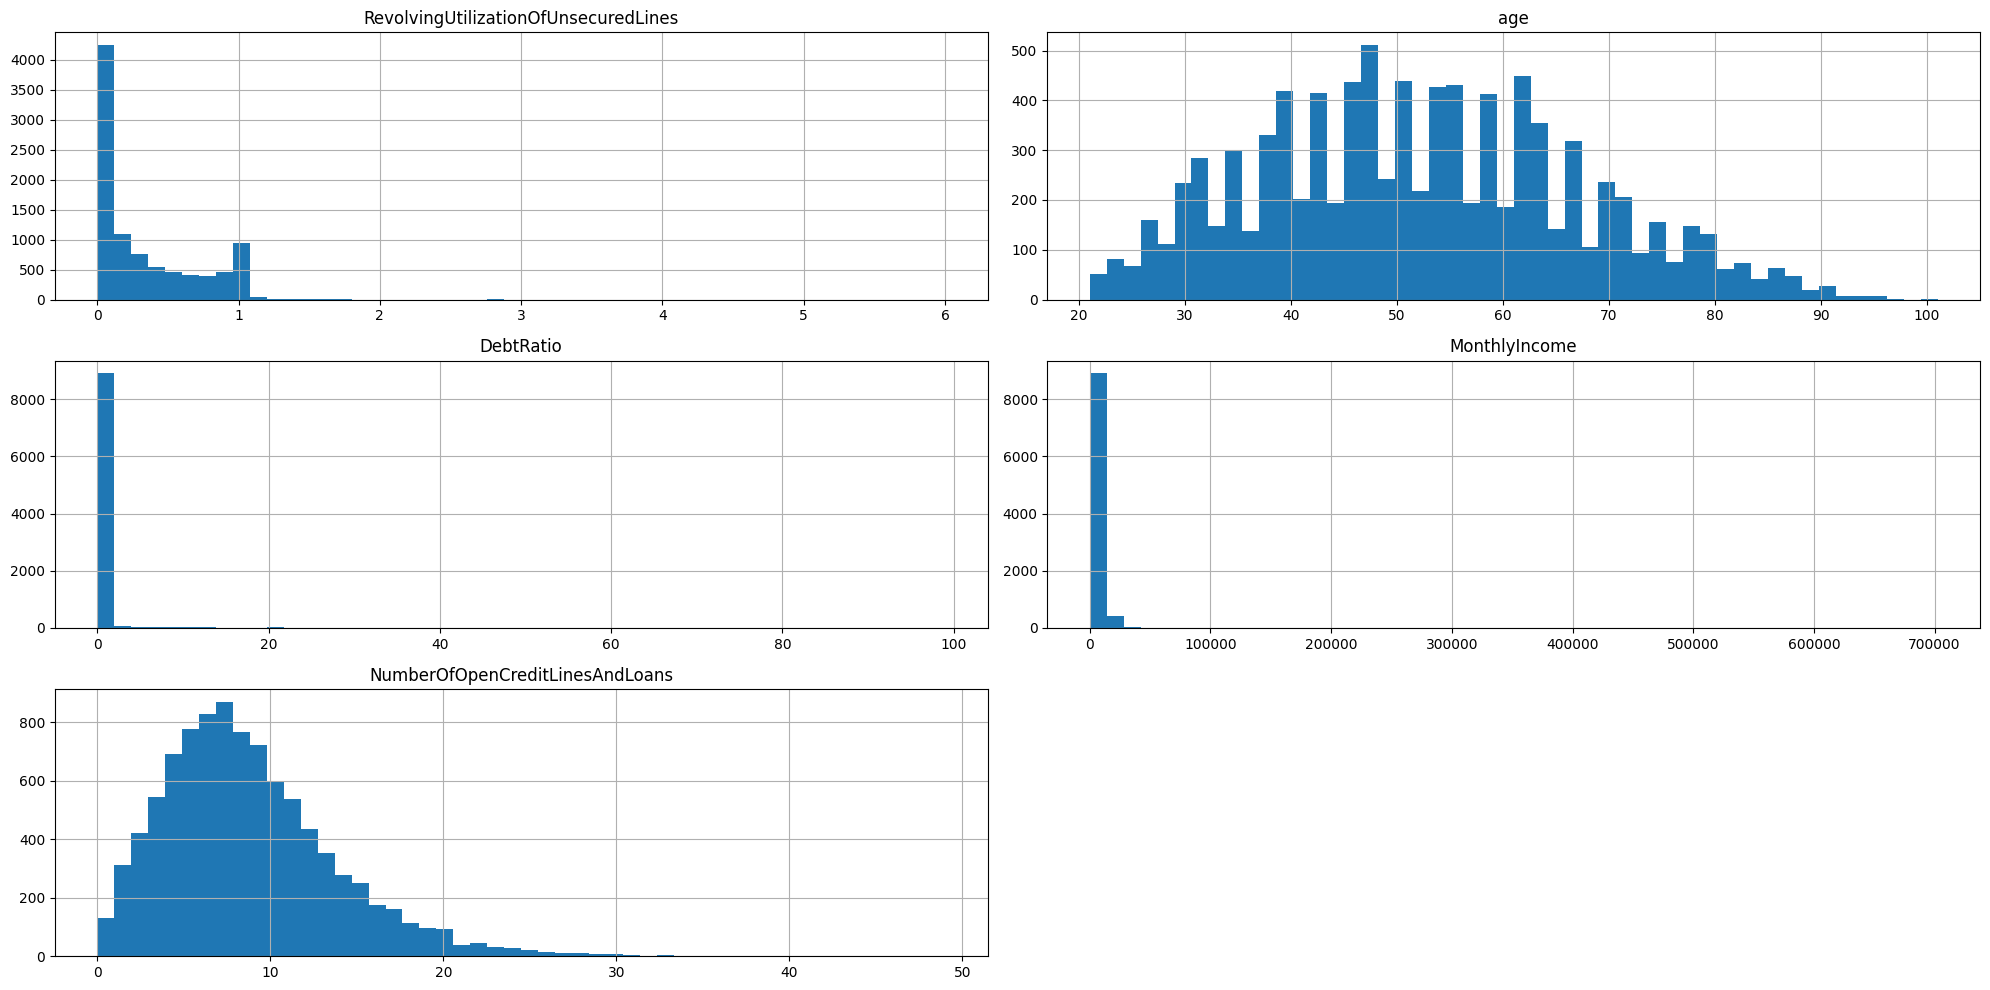

In [28]:
X_train[features_num_iniciales].hist(bins=50,figsize=(20,10))
plt.tight_layout()

In [29]:
features_num_iniciales

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

In [30]:
features_num_iniciales_log = ['RevolvingUtilizationOfUnsecuredLines',
 'DebtRatio',
 'MonthlyIncome']

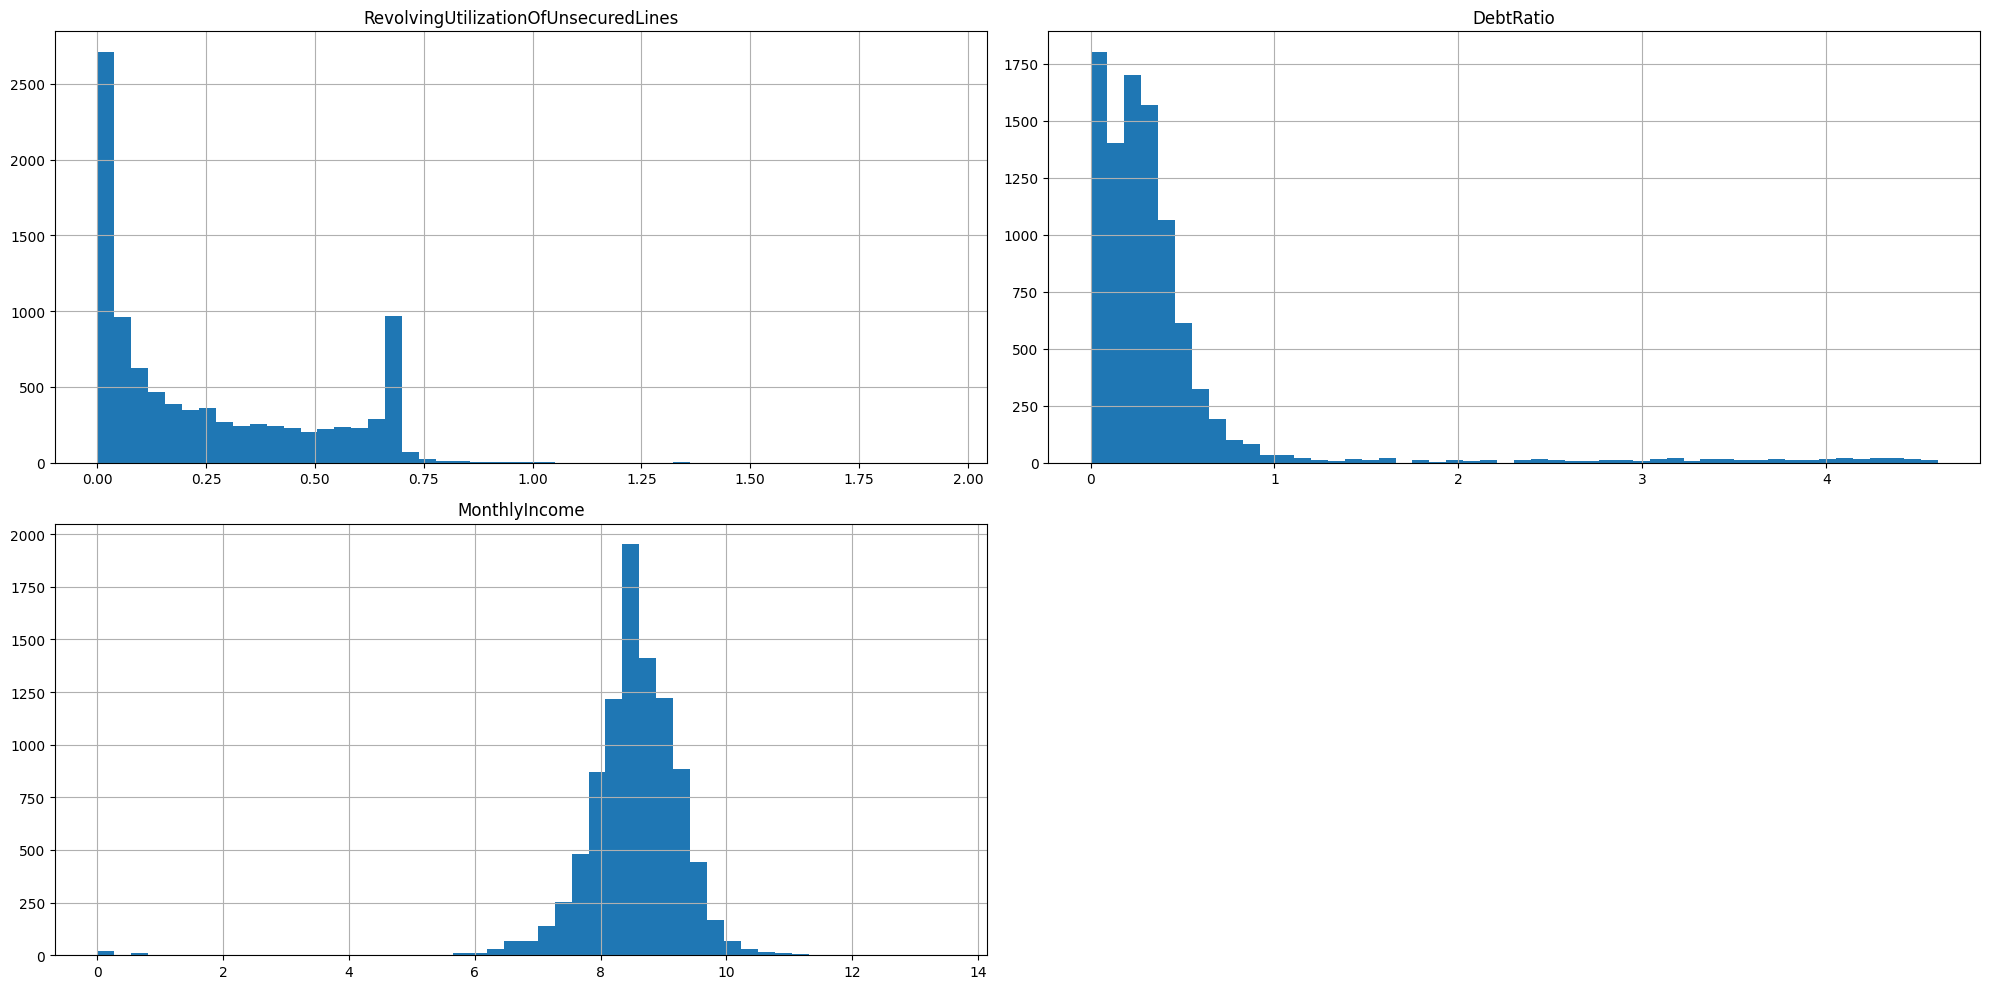

In [31]:
for col in features_num_iniciales_log:
    X_train[col] = (X_train[col]+1).apply(np.log)

# Tambien para test:
    X_test[col] = (X_test[col]+1).apply(np.log)

    

X_train[features_num_iniciales_log].hist(bins=50,figsize=(20,10))
plt.tight_layout()



In [32]:
X_train[features_num_iniciales]

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
5794,0.072796,47,0.495105,8.779711,8
9521,0.675944,52,0.583501,8.944420,15
3947,0.253164,27,0.346836,6.908755,5
2566,0.225298,36,0.358473,8.294300,11
3669,0.639287,30,0.286330,8.216358,12
...,...,...,...,...,...
12390,0.041438,44,0.187293,10.287457,11
10382,0.205168,69,0.504300,8.060540,8
5907,0.455871,57,0.623407,8.671458,13
2165,0.655658,31,0.385948,7.021976,3


Bueno, al menos ahora la zona cercana al 0 tiene resolucion, antes no era posible ver nada en esa zona.

### Numéricas y Categóricas --> Estandarizar

In [33]:
features_total = features_num_iniciales + features_cat_iniciales
features_total

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

### Vamos a aplicar StandardScaler ya que tiene menos restricciones al rango y le afectan menos los outliers (hay bastantes)

In [34]:
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler()
X_train[features_total] = std_scaler.fit_transform(X_train[features_total])

# Tambien para test

X_test[features_total] = std_scaler.transform(X_test[features_total])


In [35]:
X_train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9.402000e+03,9.402000e+03,9.402000e+03,9.402000e+03,9.402000e+03,9.402000e+03,9.402000e+03,9.402000e+03,9.402000e+03,9.402000e+03
mean,-2.058435e-16,-2.206748e-16,-1.889339e-18,1.605938e-17,-9.023485e-16,-1.530365e-16,-1.473685e-17,5.346830e-17,-7.179489e-18,-3.098517e-17
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-9.964957e-01,-2.055277e+00,-1.031847e-01,-6.073403e-01,-1.015030e+01,-1.644328e+00,-6.256922e-02,-8.747529e-01,-5.568555e-02,-7.161871e-01
25%,-8.804084e-01,-7.318845e-01,-1.031847e-01,-4.127304e-01,-4.324026e-01,-6.747833e-01,-6.256922e-02,-8.747529e-01,-5.568555e-02,-7.161871e-01
50%,-4.034822e-01,-7.018822e-02,-1.031847e-01,-2.191746e-01,7.278944e-02,-9.305649e-02,-6.256922e-02,7.601651e-03,-5.568555e-02,-7.161871e-01
75%,8.256518e-01,6.576777e-01,-1.031847e-01,-5.423205e-03,5.365694e-01,4.886703e-01,-6.256922e-02,8.899562e-01,-5.568555e-02,1.779294e-01
max,6.707974e+00,3.238293e+00,2.546809e+01,6.144442e+00,5.857911e+00,7.857210e+00,2.567450e+01,1.588998e+01,2.579240e+01,8.224977e+00


In [36]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
5794,-0.708272,-0.334867,0.940541,0.118549,0.289699,-0.093056,-0.062569,0.007602,-0.055686,1.966162
9521,1.679780,-0.004019,1.201472,0.248149,0.485554,1.264306,-0.062569,0.007602,-0.055686,-0.716187
3947,0.005861,-1.658259,-0.103185,-0.098833,-1.935065,-0.674783,-0.062569,-0.874753,-0.055686,-0.716187
2566,-0.104469,-1.062733,0.157747,-0.081772,-0.287507,0.488670,-0.062569,-0.874753,0.471826,1.966162
3669,1.534643,-1.459750,0.157747,-0.187543,-0.380187,0.682579,-0.062569,-0.874753,-0.055686,-0.716187
...,...,...,...,...,...,...,...,...,...,...
12390,-0.832430,-0.533376,-0.103185,-0.332744,2.082566,0.488670,-0.062569,1.772311,-0.055686,1.072046
10382,-0.184169,1.120865,-0.103185,0.132029,-0.565472,-0.093056,-0.062569,0.007602,-0.055686,-0.716187
5907,0.808441,0.326830,-0.103185,0.306656,0.160974,0.876488,-0.062569,0.007602,-0.055686,-0.716187
2165,1.599461,-1.393581,-0.103185,-0.041490,-1.800433,-1.062601,-0.062569,-0.874753,-0.055686,-0.716187


In [37]:
X_train_backup = X_train.copy()
y_train_backup = y_train.copy()

### 9. Balanceo del data set

### SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [39]:
y_train.value_counts(normalize=True)

SeriousDlqin2yrs
1    0.5
0    0.5
Name: proportion, dtype: float64

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

### Cross Validation de 3 modelos diferentes

In [40]:
from sklearn.model_selection import cross_validate

#### Regresion Logistica

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter = 25000)

scores = cross_validate(log_reg, X_train, y_train, cv=5,
                            scoring='recall')



print("Media de Recall:", scores['test_score'].mean())




Media de Recall: 0.7615943868809659


#### RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

random_F = RandomForestClassifier(max_depth=2, random_state=0)

scores = cross_validate(random_F, X_train, y_train, cv=5,
                            scoring='recall')

print("Media de Recall:", scores['test_score'].mean())

Media de Recall: 0.7650238720731011


#### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_validate(knn, X_train, y_train, cv=5,
                            scoring='recall')

print("Media de Recall:", scores['test_score'].mean())

Media de Recall: 0.9891480786489353


#### Conclusiones:

- KNN ha dado un recall muy alto, sospechoso, bueno, eso creo yo, pero bueno, vamos a ir con el adelante

### 10. Optimización de parametros

### KNN

In [44]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,4,5],
    'leaf_size': [3,4,5]
}

grid_search = GridSearchCV(knn,
                            param_grid,
                            cv=3, 
                            scoring="recall",
                            n_jobs = -1
                            )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [3, 4, 5], 'n_neighbors': [3, 4, 5]},
             scoring='recall')

In [45]:
from sklearn.metrics import classification_report

y_pred = grid_search.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8754
           1       0.93      1.00      0.96      8754

    accuracy                           0.96     17508
   macro avg       0.96      0.96      0.96     17508
weighted avg       0.96      0.96      0.96     17508



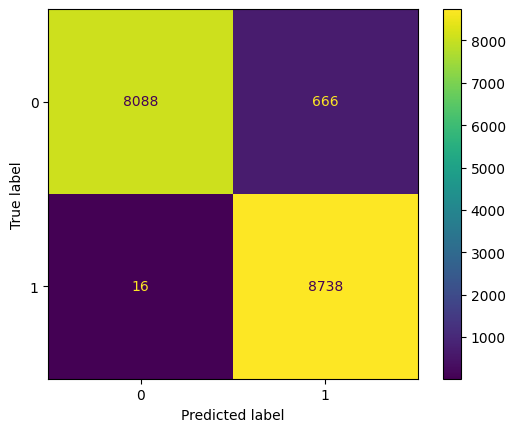

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

In [47]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2919
           1       0.23      0.44      0.30       216

    accuracy                           0.86      3135
   macro avg       0.59      0.67      0.61      3135
weighted avg       0.91      0.86      0.88      3135



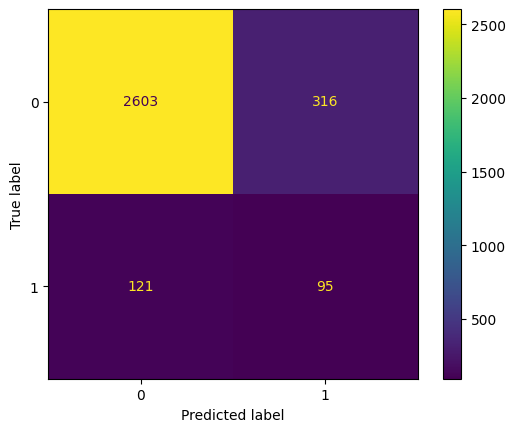

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Conclusion KNN:

- En el cross validation ha dado un valor muy alto, por eso he seguido con el, pero debe de ser que debido al desbalance tan grande en la "y", no ha sabido generalizar.

Voy a probar reduciendo la muestra.



### Under-sampling

In [49]:
from sklearn.utils import resample

X_train = X_train_backup
y_train = y_train_backup


clase_mayoritaria = X_train[y_train == 0]
clase_minoritaria = X_train[y_train == 1]


clase_mayoritaria_bajomuestreo = resample(clase_mayoritaria,
                                          replace=False,
                                          n_samples=len(clase_minoritaria), 
                                          random_state=42)


X_train_bajomuestreo = pd.concat([clase_mayoritaria_bajomuestreo, clase_minoritaria])
y_train_bajomuestreo = pd.concat([y_train.loc[clase_mayoritaria_bajomuestreo.index], 
                                  y_train.loc[clase_minoritaria.index]])

In [50]:
y_train_bajomuestreo.value_counts()

SeriousDlqin2yrs
0    648
1    648
Name: count, dtype: int64

### Regresion Logística

In [51]:
log_reg_bajo = LogisticRegression(random_state=42, max_iter = 25000)

scores = cross_validate(log_reg_bajo, X_train_bajomuestreo, y_train_bajomuestreo, cv=5,
                            scoring='recall')



print("Media de Recall:", scores['test_score'].mean())


Media de Recall: 0.759236732259988


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

random_F_bajo = RandomForestClassifier(max_depth=2, random_state=0)

scores = cross_validate(random_F, X_train_bajomuestreo, y_train_bajomuestreo, cv=5,
                            scoring='recall')

print("Media de Recall:", scores['test_score'].mean())

Media de Recall: 0.7361240310077519


### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_bajo = KNeighborsClassifier(n_neighbors=3)

scores = cross_validate(knn, X_train_bajomuestreo, y_train_bajomuestreo, cv=5,
                            scoring='recall')

print("Media de Recall:", scores['test_score'].mean())

Media de Recall: 0.6712701252236135


Ahora con el Under-sampling se ve como KNN ha salido el peor parado.    
La regresion logistica es la que mas recall ha sacado.
Vamos a ajustar los hiperparametros

In [64]:
log_reg_hiper = LogisticRegression(max_iter=10000)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100,1000],
    "penalty": ["l2", "elasticnet"],
    "solver": ["sag", "saga"]
}

grid_search = GridSearchCV(log_reg_hiper,
                            param_grid,
                            cv=3, 
                            scoring="recall"
                            )

grid_search.fit(X_train, y_train)

c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
42 fits failed out of a total of 84.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Luis\AppData\Lo

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['sag', 'saga']},
             scoring='recall')

In [66]:
y_pred = grid_search.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8754
           1       0.59      0.05      0.10       648

    accuracy                           0.93      9402
   macro avg       0.76      0.52      0.53      9402
weighted avg       0.91      0.93      0.90      9402



Que desastre.....0.05 en recall de 1...no se que esta pasando...